<a href="https://colab.research.google.com/github/ajamj/ajamj.github.io/blob/main/Contoh_project_metkom.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regresi Linear dan Polinomial

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import product

class Regression:
    def __init__(self):
        self.data = None

    def fit(self, X, y, degree=1):
        self.data = self.grid_search(X, y, degree)

    def grid_search(self, X, y, degree):
        best_score = float('inf')
        best_coefficients = None

        for coefficients in product(np.linspace(-10, 10, 100), repeat=degree + 1):
            y_pred = np.polyval(coefficients, X)
            score = np.mean((y_pred - y) ** 2)

            if score < best_score:
                best_score = score
                best_coefficients = coefficients

        return best_coefficients

    def plot_regression(self, X, y):
        if self.data is not None:
            coefficients = self.data
            x_values = np.linspace(np.min(X), np.max(X), 100)
            y_values = np.polyval(coefficients, x_values)

            plt.scatter(X, y, color='blue', label='Data Points')
            plt.plot(x_values, y_values, color='red', label='Regression Polynomial')
            plt.title('Polynomial Regression: $y = {}$'.format(' + '.join(f'{coeff}x^{i}' for i, coeff in enumerate(coefficients[::-1]))))
            plt.xlabel('X')
            plt.ylabel('Y')
            plt.legend()
            plt.show()
        else:
            print("Model belum dilatih. Silakan jalankan metode fit terlebih dahulu.")



In [18]:
# Contoh penggunaan:
X = np.array([1, 2, 3, 4, 5, 6])
y = np.array([2, 3.9, 6.1, 8, 9.8, 20])
reg = Regression()
reg.fit(X, y, degree=2)
print("Koefisien persamaan:", reg.data)



Koefisien persamaan: (0.7070707070707076, -1.717171717171718, 3.5353535353535346)


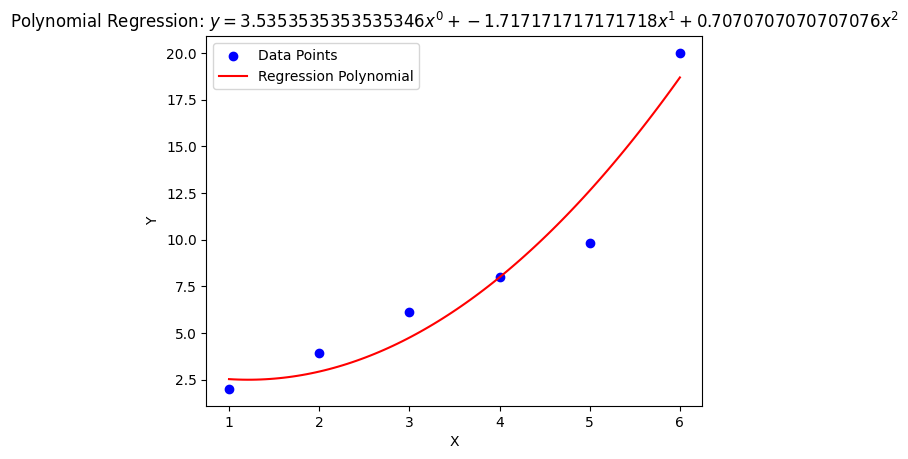

In [19]:
reg.plot_regression(X, y)